<!--NOTEBOOK_HEADER-->
*This notebook contains material from [CBE30338](https://jckantor.github.io/CBE30338);
content is available [on Github](https://github.com/jckantor/CBE30338.git).*


<!--NAVIGATION-->
< [3.8 Manometer Models and Dynamics](https://jckantor.github.io/CBE30338/03.08-Manometer-Models-and-Dynamics.html) | [Contents](toc.html) | [Tag Index](tag_index.html) | [4.0 PID Control](https://jckantor.github.io/CBE30338/04.00-PID_Control.html)<p><a href="https://colab.research.google.com/github/jckantor/CBE30338/blob/master/docs/03.09-COVID-19.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://jckantor.github.io/CBE30338/03.09-COVID-19.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>

# 3.9 Modeling and Control of a Campus Outbreak of Coronavirus COVID-19

This Jupyter/Python notebook presents models for the outbreak of an infectious disease into a susceptible population using standard epidemiological models. Model parameters are taken from a rapidly evolving scientific literature documenting the global COVID-19 outbreak. A control policy based on 'social distancing' is included in the model.

The notebook is organized as follows:

1. Brief Background on the SARS-CoV-2 Coronavirus and COVID-19
2. Model 1. SIR Model for an Infectious Disease
3. Model 2. SEIR Model
4. Model 3. SEIR Model with Control
5. Model 4. An Improved SEIR model.
6. Ideas for student projects.

The executable Python code in this notebook can be edited and run Google's cloud servers by clicking on the "Open in Colab" button located in the header. Use the interactive sliders to adjust model parameters and perform 'what if' simulations.

## 3.9.1 1. Brief background on the SARS-CoV-2 Coronavirus and COVID-19

[COVID-19](https://www.who.int/health-topics/coronavirus) is caused by the human coronavirus SARS-CoV-2. First identified in the 1960's, there are currently four human coronaviruses endemic to populations around the world:

* 229E (alpha coronavirus)
* NL63 (alpha coronavirus)
* OC43 (beta coronavirus)
* HKU1 (beta coronavirus)

These four common coronaviruses cause an upper respiratory disease that can progress to pneumonia. These endemic viruses cause about a quarter of all common colds. Most people will suffer from at least one during their lifetimes.

In recent decades, three additional coronaviruses that normally infect animals have evolved to infect humans. These include:

* MERS-CoV (the beta coronavirus that causes Middle East Respiratory Syndrome, or MERS)
* SARS-CoV (the beta coronavirus that causes severe acute respiratory syndrome, or SARS)
* SARS-CoV-2 (the novel coronavirus that causes coronavirus disease COVID-19)

The last of these, now called SARS-CoV-2, first appeared in December, 2019, at a seafood market in Wuhan (Hubei, China). The rapid spread of SARS-CoV-2 in Wuhan, and subsequent appearance in other locations around the globe, has resulted in declaration of a [global health emergency by the World Health Organization (WHO)](https://www.who.int/emergencies/diseases/novel-coronavirus-2019). Most countries are mobilizing to track the virus and control new outbreaks. At this stage, it is too early to know if efforts to contain the mitigate transmission of the virus will be successful in preventing COVID-19 from becoming a pandemic, or later an endemic disease with a global footprint. 

The latest status on the global outbreak of COVID-19 can be found at the following links:

* [Coronavirus COVID-19 Global Cases by Johns Hopkins CSSE](https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6)
* [WHO Novel Coronavirus (COVID-19) Situation](https://experience.arcgis.com/experience/685d0ace521648f8a5beeeee1b9125cd)

The purpose of this notebook is to demonstrate the modeling of an infectious epidemic using the latest available data for COVID-19, and to provide a framework for evaluating the performance of 'social distancing' and other mitigation strategies. The models and data used in this notebook have been extracted from a rapidly emerging and changing literature. Recent papers on COVID-19 can be found at the following links.

* [Cell Press Coronavirus Resource Hub](https://www.cell.com/2019-nCOV)
* [Lancet COVID-19 Resource Centre](https://www.thelancet.com/coronavirus)
* [medRxiv preprint server search on COVID-19](https://www.medrxiv.org/search/COVID-19%20numresults%3A50%20sort%3Apublication-date%20direction%3Adescending)
* [New England Journal of Medicine Coverage on Coronavirus (COVID-19)](https://www.nejm.org/coronavirus)
* [WHO Database of publications on coronavirus disease (COVID-19)](https://www.who.int/emergencies/diseases/novel-coronavirus-2019/global-research-on-novel-coronavirus-2019-ncov)

## 3.9.2 Model 1. SIR model for an infectious disease

### 3.9.2.1 Readings

* Keeling, Matt J., and Pejman Rohani. Modeling Infectious Diseases in Humans and Animals. Princeton University Press, 2008. JSTOR, www.jstor.org/stable/j.ctvcm4gk0. Accessed 25 Feb. 2020.
* Boldog, Péter, et al. "Risk Assessment of Novel Coronavirus COVID-19 Outbreaks Outside China." Journal of Clinical Medicine 9.2 (2020): 571. https://www.mdpi.com/2077-0383/9/2/571
* Bedford, Trevor. Cryptic transmission of novel coronavirus revealed by genomic epidemiology. Accessed 4 Mar 2020. https://bedford.io/blog/ncov-cryptic-transmission/

### 3.9.2.2 Introduction to SIR models

The SIR model is deterministic compartment model for the spread of an infectious disease that describes key phenomena encountered in epidemiology. In the SIR model, a population is broken into three non-overlapping groups corresponding to stages of the disease:

* **Susceptible.** The subpopulation susceptible to acquire the disease. For SARS-CoV-2, the assumption is that everyone who has not previously acquired the disease is susceptible to infection.
* **Infectious.** The subpopulation that has become infective.
* **Recovered.** The subpopulation that has recovered from infection, and presumed to be no longer susceiptible to the disease.

Neglecting demographic processes of birth and death from other causes, and assuming a negligible death rate due to infectious disease at issue, the progression of an epidemic can be modeled by rate processesl

$$\text{Susceptible}
\xrightarrow{\frac{\beta S I}{N}} 
\text{Infectious} 
\xrightarrow{\gamma I} 
\text{Recovered} $$

The rate processes are modeled as follows.

* $\frac{\beta S I}{N}$ is the rate at which susecptible population encounters the infected population resulting in trasmission of the disease. $S$ is the size of the susceptible population. $\beta$ is a the model parameters with units of 1/day. 
* $\gamma I$ is the rate at which infected population recovers and becomes resistent to further infection. $I$ is the size of the infective population.

A model for the spread of an infectious disease in a uniform population is given by the deterministic SIR equations

\begin{align*}
\frac{dS}{dt} & = -\frac{\beta S I}{N} \\
\frac{dI}{dt} & = \frac{\beta S I}{N} - \gamma I \\
\frac{dR}{dt} & = \gamma I
\end{align*} 

The model becomes more generic by working with population fractions rather than raw population counts. To this end, define

\begin{align}
s = \frac{S}{N} \qquad
i = \frac{I}{N} \qquad
r = \frac{R}{N}
\end{align} 

After substitution, this results in a system of four equations.

\begin{align*}
\frac{ds}{dt} & = -\beta s i \\
\frac{di}{dt} & = \beta s i - \gamma i \\
\frac{dr}{dt} & = \gamma i
\end{align*} 

where $s + i + r = 1$ is an invariant.

### 3.9.2.3 Key Properties of the SIR Model

The SIR model describes key epidemiological phenemena. Here is a brief synposis of the relevant results.

* The parameters $\beta$ and $\gamma$ have units of inverse time.  
* $\beta$ is rate constant associated with transmission of the infection. The corresponding time constant $\tau_{infect} = \frac{1}{\beta}$ corresponds to exponential growth of new infections in an initially susceptible population where $s=1$. 
* $\gamma$ is the rate of recovery from infections. The associated time constant $\tau_{recovery}=\frac{1}{\gamma}$ is average time to recover from an infection.
* The infectious population can grown only if $\beta s > \gamma$, that is the rate of infection is greater than the rate of recovery.
* The ratio $R_0 = \frac{\beta}{\gamma}$ is the "Basic Reproduction Number" that describes the transmissability or contagiousness of an infectious disease. 
* $R_0$ is the average number of people infected by an index 0 case in an otherwise completely susceptible population. 
* The infectious population can grow only if $R_0 s > 1$. If $s=1$, then $R_0 > 1$ is sufficient for growth of the infectious population.
* The infectious population decreases if $s R_0 < 1$ or, equivalently, $s < \frac{1}{R_0}$.
* The population has 'herd immunity' when the fraction of susceptibles is less than $\frac{1}{R_0}$.

### 3.9.2.4 Simulation

The following Python code implements a simulation of the SIR model. The parameter values were selected from the recent survey by Boldog, et al. (2020).

* $\tau_{infectious} = \frac{1}{\gamma} = 8.4$ days.
* $R_0 = \frac{\beta}{\gamma} = 2.4$ 

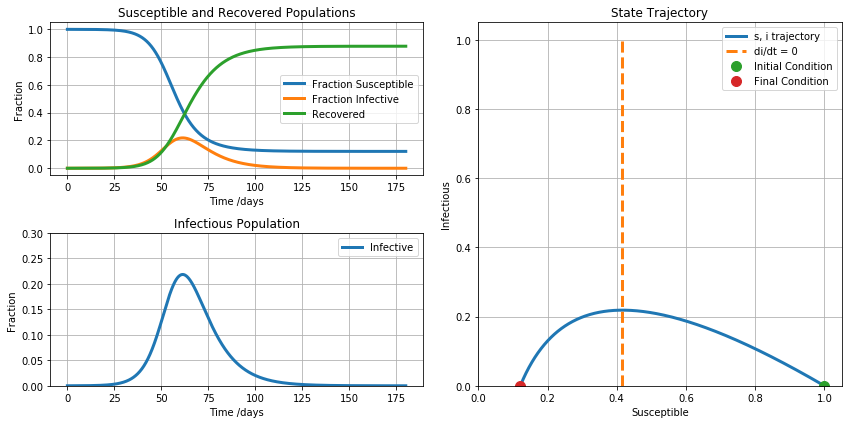

In [123]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# parameter values
R0 = 2.4
t_infective = 5.1 + 3.3

# initial number of infected and recovered individuals
i_initial = 1/20000
r_initial = 0.00
s_initial = 1 - i_initial - r_initial

gamma = 1/t_infective
beta = R0*gamma

# SIR model differential equations.
def deriv(x, t, beta, gamma):
    s, i, r = x
    dsdt = -beta * s * i
    didt = beta * s * i - gamma * i
    drdt =  gamma * i
    return [dsdt, didt, drdt]

t = np.linspace(0, 180, 2000)
x_initial = s_initial, i_initial, r_initial
soln = odeint(deriv, x_initial, t, args=(beta, gamma))
s, i, r = soln.T
e = None

def plotdata(t, s, i, e=None):
    # plot the data
    fig = plt.figure(figsize=(12,6))
    ax = [fig.add_subplot(221, axisbelow=True), 
          fig.add_subplot(223),
          fig.add_subplot(122)]

    ax[0].plot(t, s, lw=3, label='Fraction Susceptible')
    ax[0].plot(t, i, lw=3, label='Fraction Infective')
    ax[0].plot(t, r, lw=3, label='Recovered')
    ax[0].set_title('Susceptible and Recovered Populations')
    ax[0].set_xlabel('Time /days')
    ax[0].set_ylabel('Fraction')

    ax[1].plot(t, i, lw=3, label='Infective')
    ax[1].set_title('Infectious Population')
    if e is not None: ax[1].plot(t, e, lw=3, label='Exposed')
    ax[1].set_ylim(0, 0.3)
    ax[1].set_xlabel('Time /days')
    ax[1].set_ylabel('Fraction')

    ax[2].plot(s, i, lw=3, label='s, i trajectory')
    ax[2].plot([1/R0, 1/R0], [0, 1], '--', lw=3, label='di/dt = 0')
    ax[2].plot(s[0], i[0], '.', ms=20, label='Initial Condition')
    ax[2].plot(s[-1], i[-1], '.', ms=20, label='Final Condition')
    ax[2].set_title('State Trajectory')
    ax[2].set_aspect('equal')
    ax[2].set_ylim(0, 1.05)
    ax[2].set_xlim(0, 1.05)
    ax[2].set_xlabel('Susceptible')
    ax[2].set_ylabel('Infectious')

    for a in ax: 
        a.grid(True)
        a.legend()

    plt.tight_layout()
    
plotdata(t, s, i)

### 3.9.2.5 How many people will be infected following an outbreak?

Given an outbreak in a susceptible population, the final state is reached when $i$ returns to a near zero value. A formula for the final state can be found by taking the ratio 

\begin{align}
\frac{di}{ds} & = \frac{\frac{di}{dt}}{\frac{ds}{dt}}  =  -1 + \frac{1}{s R_0} & \\
\end{align}

Integrating,

\begin{align}
\int_{i_0}^{i_f} di & =  \int_{s_0}^{s_f} (-1 + \frac{1}{s R_0}) ds & \\
\end{align}


\begin{align}
i_f - i_0 & =  -(s_f - s_0) + \frac{1}{R_0} \ln\frac{s_f}{s_0}  & \\
\end{align}

The starting point of an outbreak begins with a very small value $i_0 \approx 0$ and ends with a very small value $i_f \approx 0$. Setting $i_0 = i_f = 0$ gives

\begin{align}
s_f - \frac{1}{R_0}\ln s_f & = s_0 - \frac{1}{R_0} \ln{s_0}  & \\
\end{align}

For the special case of an initially susceptible population, $s_0 = 1$ which gives 

\begin{align}
s_f - \frac{1}{R_0} \ln s_f & = 1
\end{align}

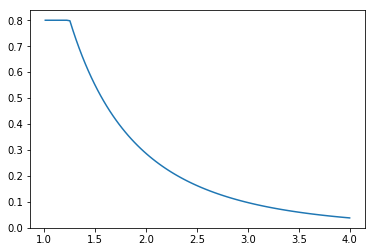

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq, fminbound

def f(s, R0):
    return s - np.log(s)/R0

def g(s0, R0):
    rhs = f(s0, R0)
    smin = fminbound(lambda s: f(s, R0), 0.0001, 1)
    return brentq(lambda s: f(s, R0) - f(s0, R0), 0.001, smin)

R0 = np.linspace(1.01, 4.0, 100)
sf = [g(0.8, R0) for R0 in R0]

plt.plot(R0, sf)


## 3.9.3 Model 2. SEIR model

The SEIR model extends the SIR model by adding an additional population compartment containing those individuals who have been exposed to the virus but not yet infective.

* **Exposed.** The subpopulation that has been exposed to the disease but not yet infective. 

The compartment model can be diagrammed as follows.

$$\text{Susceptible}
\xrightarrow{\frac{\beta S I}{N}} 
\text{Exposed} 
\xrightarrow{\alpha E} 
\text{Infectious} 
\xrightarrow{\gamma I} 
\text{Recovered} $$

The rate processes are modeled as follows.

* $\frac{\beta S I}{N}$ is the rate at which susecptible population encounters the infected population resulting in trasmission of the disease. $S$ is the size of the susceptible population. $\beta$ is a the model parameters with units of 1/day. 
* $\alpha E$ is the rate at which exposed population becomes infective, where $E$ is the size of the exposed population. The average period of time in the exposed state is the incubation period of the disease, and equal to $\frac{1}{\alpha}$.
* $\gamma I$ is the rate at which infected population recovers and becomes resistent to further infection. $I$ is the size of the infective population.

An elementary model for the spread of an infectious disease in a uniform population is given by the deterministic SEIR equations}

After substitution, this results in a system of four equations.

\begin{align*}
\frac{ds}{dt} & = -\beta s i \\
\frac{de}{dt} & = \beta s i - \alpha e \\
\frac{di}{dt} & = \alpha e  - \gamma i \\
\frac{dr}{dt} & = \gamma i
\end{align*} 

where $s + e + i + r = 1$ is an invariant.

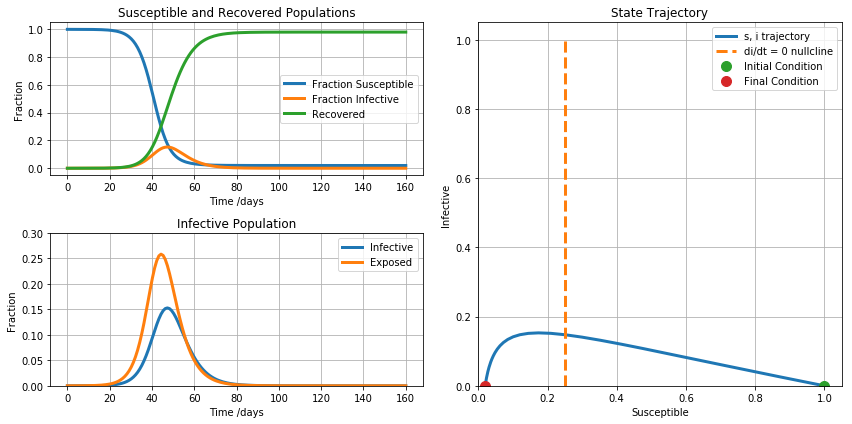

In [115]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# parameter values
R0 = 4
t_incubation = 5.1
t_infective = 3.3

# initial number of infected and recovered individuals
e_initial = 1/20000
i_initial = 0.00
r_initial = 0.00
s_initial = 1 - e_initial - i_initial - r_initial

alpha = 1/t_incubation
gamma = 1/t_infective
beta = R0*gamma

# SEIR model differential equations.
def deriv(x, t, alpha, beta, gamma):
    s, e, i, r = x
    dsdt = -beta * s * i
    dedt =  beta * s * i - alpha * e
    didt = alpha * e - gamma * i
    drdt =  gamma * i
    return [dsdt, dedt, didt, drdt]

t = np.linspace(0, 160, 160)
x_initial = s_initial, e_initial, i_initial, r_initial
soln = odeint(deriv, x_initial, t, args=(alpha, beta, gamma))
s, e, i, r = soln.T

plotdata(t, s, i, e)

* The addition of an exposed population compartment slows the outbreak, but doesn't appear to reduce the number of people ultimately infected by the disease.

* What are the campus policy implications of these results?

## 3.9.4 Model 3. Mitigation and Social Distancing

* Pan, Jinhua, et al. "Effectiveness of control strategies for Coronavirus Disease 2019: a SEIR dynamic modeling study." medRxiv (2020). https://www.medrxiv.org/content/10.1101/2020.02.19.20025387v3.full.pdf

The lack of a vaccine reduces the options for controlling the COVID-19 outbreak. Current efforts are focused on 'social distancing' designed to reduce transmission of the virus from individuals in the infective state to susceptible individuals.

For the purposes of modeling, we introduce a control parameter $u$ indicating the effectiveness of these efforts. $u=0$ corresponds to no controls, $u=1$ corresponds to perfect isolation of infective individuals. The purpose of this model is to explore how a social distancing stragtegy affects the outcome of an epidemic.

* **Exposed.** The subpopulation that has been exposed to the disease but not yet infective. 

The compartment model can be diagrammed as follows.

$$\text{Susceptible}
\xrightarrow{(1-u)\frac{\beta S I}{N}} 
\text{Exposed} 
\xrightarrow{\alpha E} 
\text{Infectious} 
\xrightarrow{\gamma I} 
\text{Recovered} $$

The rate processes are modeled as follows.

* $(1-u)\frac{\beta S I}{N}$ is the rate at which susecptible population encounters the infected population resulting in trasmission of the disease. $u$ describes the effectiveness on any public health interventions to control transmission of the disease. $u=0$ means no effective public health interventions, $u=1$ means total elimination of disease transmission..

After substitution, this results in a system of four equations.

\begin{align*}
\frac{ds}{dt} & = -(1-u)\beta s i \\
\frac{de}{dt} & = (1-u)\beta s i - \alpha e \\
\frac{di}{dt} & = \alpha e  - \gamma i \\
\frac{dr}{dt} & = \gamma i
\end{align*} 

where $s + e + i + r = 1$ is an invariant.

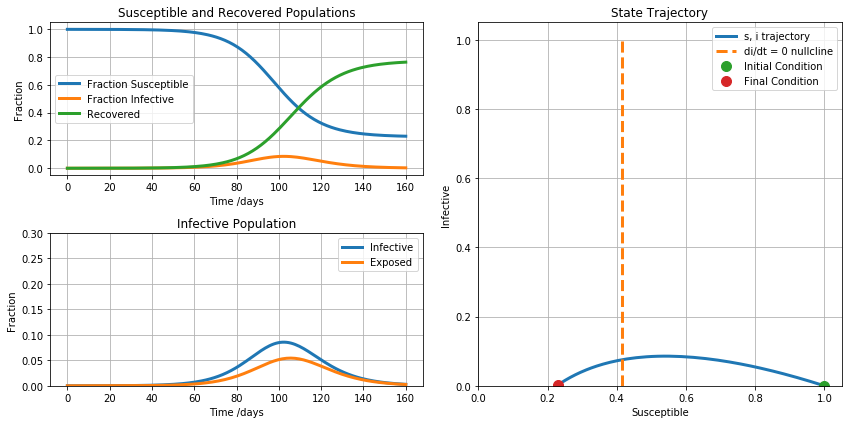

In [120]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# parameter values
u = 0.2
R0 = 2.4
t_incubation = 5.1
t_infective = 3.3

# initial number of infected and recovered individuals
e_initial = 1/20000
i_initial = 0.00
r_initial = 0.00
s_initial = 1 - e_initial - i_initial - r_initial

alpha = 1/t_incubation
gamma = 1/t_infective
beta = R0*gamma

# SEIR model differential equations.
def deriv(x, t, alpha, beta, gamma):
    s, e, i, r = x
    dsdt = -(1-u)*beta * s * i
    dedt =  (1-u)*beta * s * i - alpha * e
    didt = alpha * e - gamma * i
    drdt =  gamma * i
    return [dsdt, dedt, didt, drdt]

t = np.linspace(0, 160, 160)
x_initial = s_initial, e_initial, i_initial, r_initial
soln = odeint(deriv, x_initial, t, args=(alpha, beta, gamma))
s, e, i, r = soln.T

plotdata(t, s, e, i)

Social distancing has several beneficial effects:

* Slows down the progress of the epidemic.
* Seduces the fraction of the population infected at any point in time, thereby reducing strain on health care resources.
* Reduces the number of individuals ultimately experiencing the disease. For a disease with a non-zero mortaility, this saves lives.

### 3.9.4.1 Social Distancing Strategies for the Campus

The basic strategy is to slow transmission through 'social distancing' with the following goals:
* Reduce the number of individuals acquiring the virus.
* Slowing progress of any outbreak long enough to complete the semester.

[CDC Social Distancing](https://www.cdc.gov/coronavirus/2019-ncov/community/guidance-ihe-response.html)

* Replace large section courses with streaming lectures. Close the largest lecture halls for the remainder of the term.
* Bring food to the dorms rather than the dorms to food.
* Locate an area to isolate and quarantine students with potential infectious state.
* Hold Saturday classes, move graduation up one week.


## 3.9.5 Model 4. Improving the fidelity of the model.

Boldog, et al.

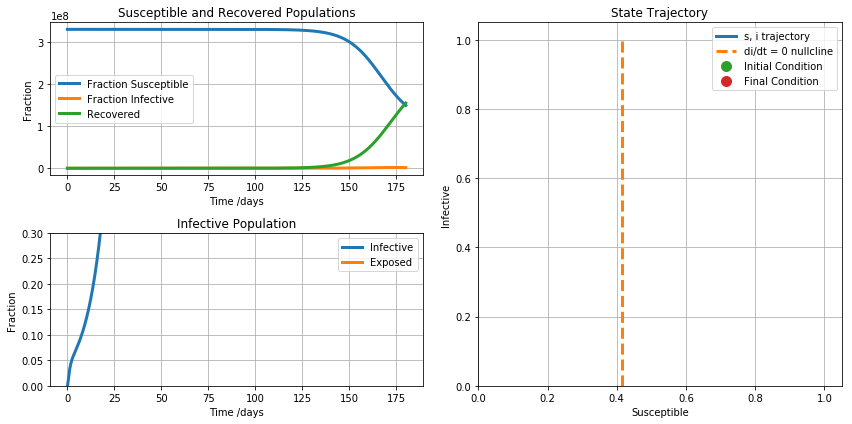

In [121]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

u = 0.3
mu = 0
alpha = 1/5.1   # incubation period
R0 = 2.4
gamma = 3.3
beta = R0*gamma

N = 331000000

def SEIR(x, t):
    S, E1, E2, I1, I2, I3, R = x
    dS = -(1-u)*beta*S*(I1 + I2 + I3)/N
    dE1 = -dS - 2*alpha*E1
    dE2 = 2*alpha*E1 - 2*alpha*E2
    dI1 = 2*alpha*E2 - 3*gamma*I1 - mu*I1
    dI2 = 3*gamma*I1 - 3*gamma*I2 - mu*I2
    dI3 = 3*gamma*I2 - 3*gamma*I3 - mu*I3
    dR = 3*gamma*I3
    return [dS, dE1, dE2, dI1, dI2, dI3, dR]


IC = [N, 1, 0, 0, 0, 0, 0]
t = np.linspace(0, 180, 1000)


soln = odeint(SEIR, IC, t)

s = soln[:, 0]
e = soln[:, 1] + soln[:, 2]
i = soln[:, 3] + soln[:, 4] + soln[:, 5]
r = soln[:, 6]

plotdata(t, s, i, e)

## 3.9.6 Additional Modeling Opportunities. Transportation, power law kinetics, etc.

* Ziff, Robert M., and Anna L. Ziff. "Fractal kinetics of COVID-19 pandemic." medRxiv (2020). https://www.medrxiv.org/content/10.1101/2020.02.16.20023820v1

* Peng, Liangrong, et al. "Epidemic analysis of COVID-19 in China by dynamical modeling." arXiv preprint arXiv:2002.06563 (2020).  https://arxiv.org/abs/2002.06563

* Wu, Joseph T., Kathy Leung, and Gabriel M. Leung. "Nowcasting and forecasting the potential domestic and international spread of the 2019-nCoV outbreak originating in Wuhan, China: a modelling study." The Lancet (2020). https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(20)30260-9/fulltext

* Tuite, Ashleigh R., and David N. Fisman. "Reporting, Epidemic Growth, and Reproduction Numbers for the 2019 Novel Coronavirus (2019-nCoV) Epidemic." Annals of Internal Medicine (2020). https://annals.org/aim/fullarticle/2760912

<!--NAVIGATION-->
< [3.8 Manometer Models and Dynamics](https://jckantor.github.io/CBE30338/03.08-Manometer-Models-and-Dynamics.html) | [Contents](toc.html) | [Tag Index](tag_index.html) | [4.0 PID Control](https://jckantor.github.io/CBE30338/04.00-PID_Control.html)<p><a href="https://colab.research.google.com/github/jckantor/CBE30338/blob/master/docs/03.09-COVID-19.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://jckantor.github.io/CBE30338/03.09-COVID-19.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>